# Titanic Dataset of using the ANN Model

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv("C:/Users/Lenovo/Documents/Data Set/titanic.csv")

In [3]:
titanic_df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [4]:
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
titanic_df.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C
711,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,Q


In [6]:
titanic_df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
titanic_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
707    False
708    False
709    False
710    False
711    False
Length: 712, dtype: bool

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   712 non-null    int64  
 1   PassengerId  712 non-null    int64  
 2   Survived     712 non-null    int64  
 3   Pclass       712 non-null    int64  
 4   Name         712 non-null    object 
 5   Sex          712 non-null    object 
 6   Age          712 non-null    float64
 7   SibSp        712 non-null    int64  
 8   Parch        712 non-null    int64  
 9   Ticket       712 non-null    object 
 10  Fare         712 non-null    float64
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 66.9+ KB


In [9]:
titanic_df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,447.589888,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,676.250000,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [10]:
titanic_df = titanic_df.drop(["Unnamed: 0","PassengerId","Name","Ticket"],axis = 1)

In [11]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [12]:
titanic_df.shape

(712, 8)

In [13]:
print(titanic_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [14]:
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


# Exploratory Data Analysis of each column

# 1. Histogram

(array([424.,   0.,   0.,   0., 288.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

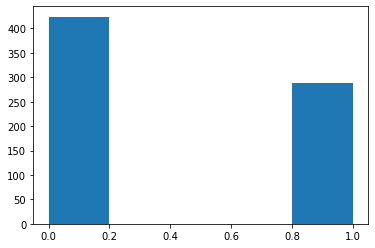

In [15]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Survived'],bins=5)

(array([184.,   0., 173.,   0., 355.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <BarContainer object of 5 artists>)

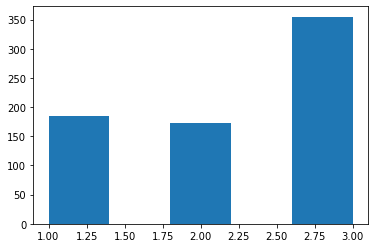

In [16]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Pclass'],bins=5)

(array([453.,   0.,   0.,   0., 259.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

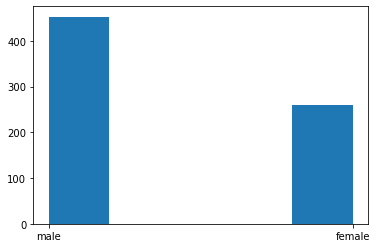

In [17]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Sex'],bins=5)

(array([100., 346., 187.,  68.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

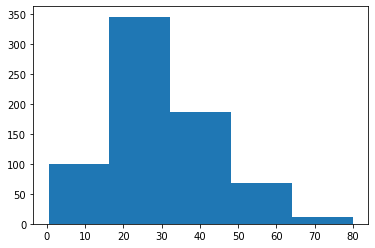

In [18]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Age'],bins=5)

(array([469., 183.,  25.,  12.,  23.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

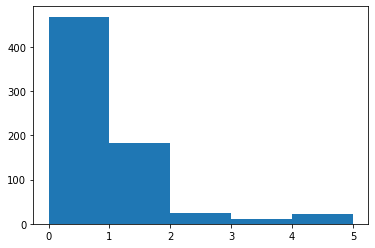

In [19]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['SibSp'],bins=5)

(array([629.,  68.,   5.,   4.,   6.]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <BarContainer object of 5 artists>)

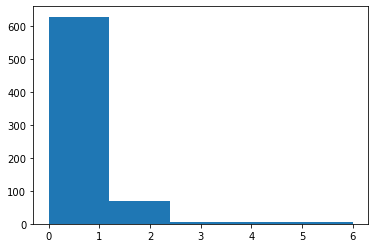

In [20]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Parch'],bins=5)

(array([664.,  30.,  15.,   0.,   3.]),
 array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]),
 <BarContainer object of 5 artists>)

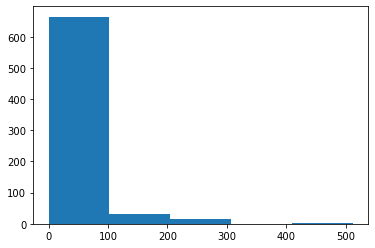

In [21]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Fare'],bins=5)

(array([554.,   0., 130.,   0.,  28.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

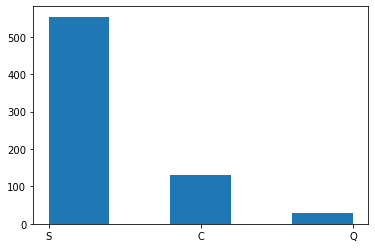

In [22]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['Embarked'],bins=5)

# 2.Distplot

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

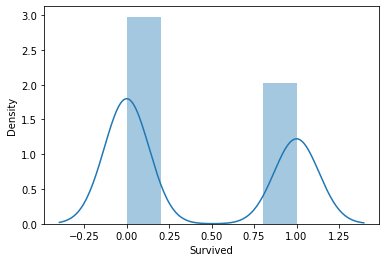

In [23]:
import seaborn as sns
sns.distplot(titanic_df['Survived'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

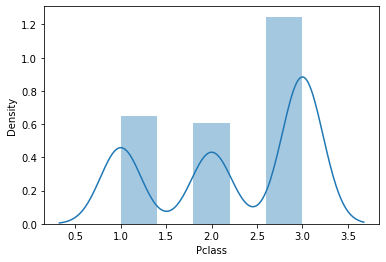

In [24]:
import seaborn as sns
sns.distplot(titanic_df['Pclass'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

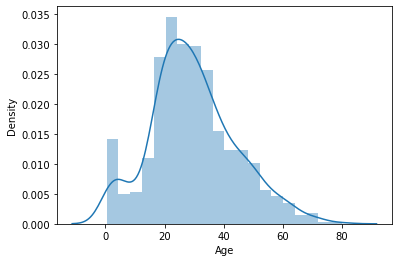

In [25]:
import seaborn as sns
sns.distplot(titanic_df['Age'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

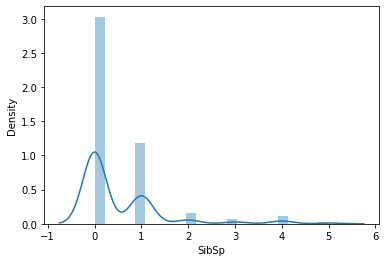

In [26]:
import seaborn as sns
sns.distplot(titanic_df['SibSp'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

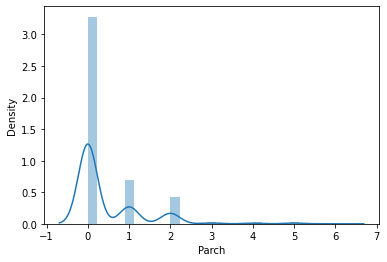

In [27]:
import seaborn as sns
sns.distplot(titanic_df['Parch'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

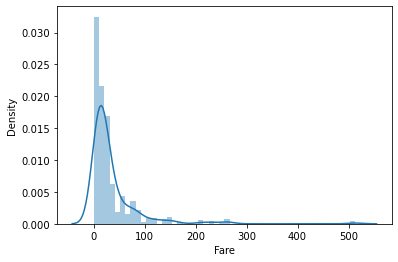

In [28]:
import seaborn as sns
sns.distplot(titanic_df['Fare'])

# 3.Box Plot

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived'>

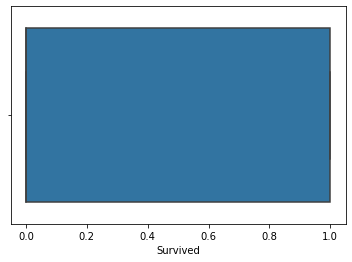

In [29]:
import seaborn as sns
sns.boxplot(titanic_df['Survived'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

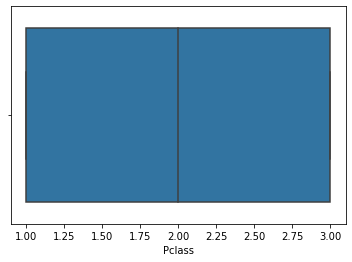

In [30]:
import seaborn as sns
sns.boxplot(titanic_df['Pclass'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

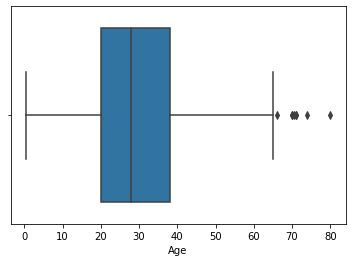

In [31]:
import seaborn as sns
sns.boxplot(titanic_df['Age'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

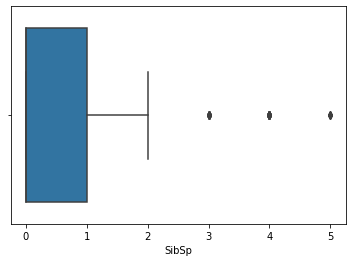

In [32]:
import seaborn as sns
sns.boxplot(titanic_df['SibSp'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

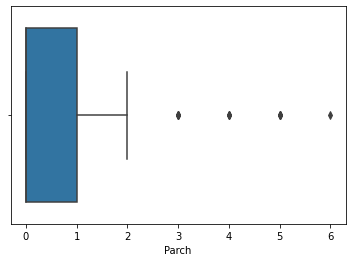

In [33]:
import seaborn as sns
sns.boxplot(titanic_df['Parch'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

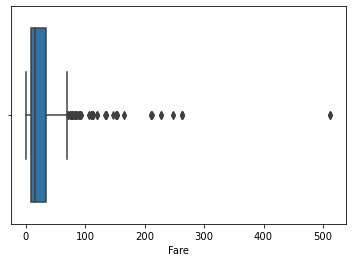

In [34]:
import seaborn as sns
sns.boxplot(titanic_df['Fare'])

# 4.Pie Chart

<AxesSubplot:ylabel='Survived'>

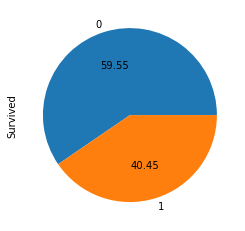

In [35]:
titanic_df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Pclass'>

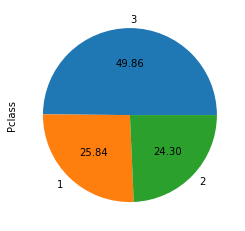

In [36]:
titanic_df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Sex'>

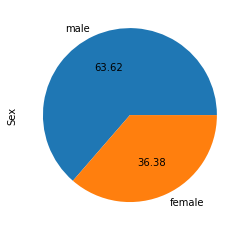

In [37]:
titanic_df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='SibSp'>

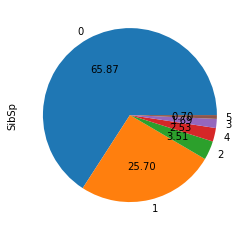

In [38]:
titanic_df['SibSp'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Parch'>

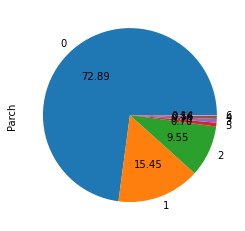

In [39]:
titanic_df['Parch'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Embarked'>

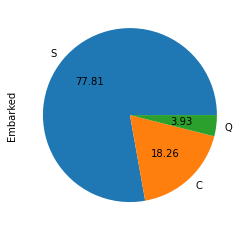

In [40]:
titanic_df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

# Define a function to remove outliers using the IQR method

In [41]:
def remove_outliers(titanic_df1, column):
    Q1 = titanic_df1[column].quantile(0.25)
    Q3 = titanic_df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return titanic_df1[(titanic_df1[column] >= lower_bound) & (titanic_df1[column] <= upper_bound)]

# Call the function on the desired columns of the dataset
df = remove_outliers(titanic_df, 'Fare')

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,1,male,54.0,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [43]:
df.shape

(617, 8)

In [44]:
# Count the occurrences of each unique value in the column
value_counts = df['SibSp'].value_counts()

In [45]:
value_counts

0    426
1    141
4     18
2     18
3      9
5      5
Name: SibSp, dtype: int64

In [46]:
# Count the occurrences of each unique value in the column
value_counts = df['Parch'].value_counts()

In [47]:
value_counts

0    464
1     90
2     49
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

# Feature Engineering

In [48]:
# one-hot encode the 'gender' column
one_hot_encoded = pd.get_dummies(df[['Sex']])

# concatenate the original dataframe with the one-hot encoded dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# display the resulting dataframe
print(df_encoded)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.0      1      0   7.2500        S   
2           1       3  female  26.0      0      0   7.9250        S   
3           1       1  female  35.0      1      0  53.1000        S   
4           0       3    male  35.0      0      0   8.0500        S   
5           0       1    male  54.0      0      0  51.8625        S   
..        ...     ...     ...   ...    ...    ...      ...      ...   
707         0       3  female  39.0      0      5  29.1250        Q   
708         0       2    male  27.0      0      0  13.0000        S   
709         1       1  female  19.0      0      0  30.0000        S   
710         1       1    male  26.0      0      0  30.0000        C   
711         0       3    male  32.0      0      0   7.7500        Q   

     Sex_female  Sex_male  
0             0         1  
2             1         0  
3             1         0  
4             0         1  
5      

In [49]:
df1 = df_encoded

In [50]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,S,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1
5,0,1,male,54.0,0,0,51.8625,S,0,1
...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,1,0
708,0,2,male,27.0,0,0,13.0000,S,0,1
709,1,1,female,19.0,0,0,30.0000,S,1,0
710,1,1,male,26.0,0,0,30.0000,C,0,1


# Apply ordinal encoding to the Embarked column

In [51]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [52]:
# Define the categories and their order
categories = ['C', 'Q', 'S']

# Initialize the OrdinalEncoder object
encoder = OrdinalEncoder(categories=[categories])

# Fit and transform the 'Embarked' column using the encoder
df1['Embarked_encoded'] = encoder.fit_transform(df1[['Embarked']])

# Display the resulting DataFrame
print(df1[['Embarked', 'Embarked_encoded']].head())

  Embarked  Embarked_encoded
0        S               2.0
2        S               2.0
3        S               2.0
4        S               2.0
5        S               2.0


In [53]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,0,1,2.0
2,1,3,female,26.0,0,0,7.9250,S,1,0,2.0
3,1,1,female,35.0,1,0,53.1000,S,1,0,2.0
4,0,3,male,35.0,0,0,8.0500,S,0,1,2.0
5,0,1,male,54.0,0,0,51.8625,S,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,1,0,1.0
708,0,2,male,27.0,0,0,13.0000,S,0,1,2.0
709,1,1,female,19.0,0,0,30.0000,S,1,0,2.0
710,1,1,male,26.0,0,0,30.0000,C,0,1,0.0


In [54]:
df1.shape

(617, 11)

In [55]:
df2 = df1.drop(["Sex","Embarked"],axis = 1)

In [56]:
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_encoded
0,0,3,22.0,1,0,7.2500,0,1,2.0
2,1,3,26.0,0,0,7.9250,1,0,2.0
3,1,1,35.0,1,0,53.1000,1,0,2.0
4,0,3,35.0,0,0,8.0500,0,1,2.0
5,0,1,54.0,0,0,51.8625,0,1,2.0
...,...,...,...,...,...,...,...,...,...
707,0,3,39.0,0,5,29.1250,1,0,1.0
708,0,2,27.0,0,0,13.0000,0,1,2.0
709,1,1,19.0,0,0,30.0000,1,0,2.0
710,1,1,26.0,0,0,30.0000,0,1,0.0


In [57]:
df2.shape

(617, 9)

In [58]:
X = df2.drop(["Survived"],axis = 1) # Independent Variable

In [59]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_encoded
0,3,22.0,1,0,7.2500,0,1,2.0
2,3,26.0,0,0,7.9250,1,0,2.0
3,1,35.0,1,0,53.1000,1,0,2.0
4,3,35.0,0,0,8.0500,0,1,2.0
5,1,54.0,0,0,51.8625,0,1,2.0
...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,1,0,1.0
708,2,27.0,0,0,13.0000,0,1,2.0
709,1,19.0,0,0,30.0000,1,0,2.0
710,1,26.0,0,0,30.0000,0,1,0.0


In [60]:
y = df2[["Survived"]] # Dependent Variable

In [61]:
y

,Survived
0,0
2,1
3,1
4,0
5,0
...,...
707,0
708,0
709,1
710,1


# Apply the Standard Scaler

In [62]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [63]:
X

array([[ 0.77887597, -0.48335538,  0.53751292, ..., -0.7002415 ,
         0.7002415 ,  0.45533969],
       [ 0.77887597, -0.20393369, -0.51199806, ...,  1.42807873,
        -1.42807873,  0.45533969],
       [-1.92093568,  0.42476514,  0.53751292, ...,  1.42807873,
        -1.42807873,  0.45533969],
       ...,
       [-1.92093568, -0.69292166, -0.51199806, ...,  1.42807873,
        -1.42807873,  0.45533969],
       [-1.92093568, -0.20393369, -0.51199806, ..., -0.7002415 ,
         0.7002415 , -2.38248441],
       [ 0.77887597,  0.21519886, -0.51199806, ..., -0.7002415 ,
         0.7002415 , -0.96357236]])

In [64]:
y

,Survived
0,0
2,1
3,1
4,0
5,0
...,...
707,0
708,0
709,1
710,1


# Used the Deep learning model (It is ANN with binary classification problem )

# Keras Tuner- Decide Number of Hidden Layers And Neuron In Neural Network

In [67]:
pip install -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner import HyperParameters
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define your model using the Keras API:

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', kernel_initializer=hp.Choice('kernel_initializer', values=['glorot_uniform', 'he_normal']), input_shape=(8,), kernel_regularizer=regularizers.l2(hp.Choice('l2_regularization', values=[0.001, 0.0001, 0.00001]))))
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', kernel_initializer=hp.Choice('kernel_initializer', values=['glorot_uniform', 'he_normal']), kernel_regularizer=regularizers.l2(hp.Choice('l2_regularization', values=[0.001, 0.0001, 0.00001]))))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    return model, early_stop

# Instantiate a tuner object and define the search space:

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='helloworld')

# Search for the best hyperparameters:

tuner.search(x=X_train, y=y_train, epochs=10, validation_data=(X_val, y_val))

# Retrieve the best hyperparameters and retrain the model:

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model, early_stop = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

INFO:tensorflow:Reloading Tuner from my_dir\helloworld\tuner0.json


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9960\353560542.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


INFO:tensorflow:Oracle triggered exit
Epoch 1/100
16/16 [==============================] - 5s 40ms/step - loss: 0.9884 - accuracy: 0.7525 - val_loss: 0.8862 - val_accuracy: 0.7742
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.8174 - accuracy: 0.8012 - val_loss: 0.8016 - val_accuracy: 0.7984
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.7303 - accuracy: 0.8195 - val_loss: 0.7278 - val_accuracy: 0.7984
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6630 - accuracy: 0.8296 - val_loss: 0.7001 - val_accuracy: 0.7903
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6260 - accuracy: 0.8357 - val_loss: 0.6729 - val_accuracy: 0.7984
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5914 - accuracy: 0.8377 - val_loss: 0.6384 - val_accuracy: 0.7903
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5681 - accuracy: 0.8377 - val_loss: 0.6

In [70]:
# Evaluate the model on the test set and print the test accuracy:
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7823
Test accuracy: 0.7822580933570862


In [71]:
# Evaluate the model on the test set and print the test accuracy:
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', train_acc)

16/16 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8580
Train accuracy: 0.8580121994018555
